# DAT210x - Programming with Python for DS

## Module4- Lab5

In [68]:
import math, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io

from mpl_toolkits.mplot3d import Axes3D

In [69]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Create a regular Python list (not NDArray) and name it `samples`:

In [71]:
# .. your code here ..

def Plot2D(T, title, x, y, colors,num_to_plot=20):
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    
    for i in range(num_to_plot):
        img_num = int(random.random() * num_images)
        x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
        x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
        img = df.iloc[img_num,:].values.reshape(num_pixels_row, num_pixels_columns)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7, color = colors)

Code up a for-loop that iterates over the images in the `Datasets/ALOI/32/` folder. Look in the folder first, so you know how the files are organized, and what file number they start from and end at.

Load each `.png` file individually in your for-loop using the instructions provided in the Feature Representation reading. Once loaded, flatten the image into a single-dimensional NDArray and append it to your `samples` list.

**Optional**: You can resample the image down by a factor of two if you have a slower computer. You can also scale the image from `0-255` to `0.0-1.0` if you'd like--doing so shouldn't have any effect on the algorithm's results.

In [72]:
# .. your code here ..
import imageio
import os
samples = []

directory = 'Datasets/ALOI/32/'
directory2 = 'Datasets/ALOI/32i/'

imgs1 = os.listdir(directory)
imgs2 = os.listdir(directory2)
images = imgs1 + imgs2
colors = len(imgs1) * ['b'] + len(imgs2) * ['r']

for filename in images:
    if filename in imgs1:    
        img = imageio.imread(directory + filename)
    else:
        img = imageio.imread(directory2 + filename)
    samples.append(img.reshape(-1))
print(colors)

          


['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']


Convert `samples` to a DataFrame named `df`:

In [73]:
# .. your code here ..
df = pd.DataFrame(samples)
df

,0,1,2,3,4,5,6,7,8,9,...,27638,27639,27640,27641,27642,27643,27644,27645,27646,27647
0,4,4,4,3,3,3,3,3,3,3,...,12,13,13,13,12,12,12,12,12,7
1,4,4,4,3,4,4,3,3,4,4,...,12,13,13,13,12,13,12,13,13,7
2,4,4,4,4,4,4,4,4,4,4,...,12,12,12,12,12,12,11,12,11,6
3,4,4,4,4,4,4,4,4,4,4,...,11,11,11,12,12,11,12,12,11,7
4,4,4,4,4,4,4,4,4,4,4,...,11,11,12,12,11,11,11,11,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,4,4,4,4,4,4,4,4,5,5,...,12,13,13,12,12,12,13,13,12,7
80,4,4,4,4,4,4,4,4,4,5,...,12,12,12,12,12,12,12,13,12,7
81,4,4,4,4,4,4,4,4,4,4,...,12,13,13,12,12,12,12,13,12,7
82,5,4,4,4,4,4,4,4,4,4,...,13,13,13,13,13,12,12,13,12,7


Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

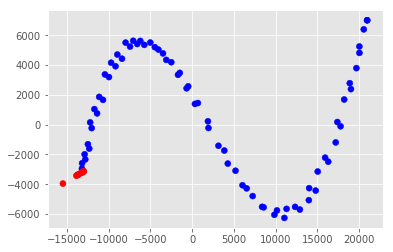

In [81]:
# .. your code here ..
from sklearn import manifold
iso = manifold.Isomap(n_neighbors = 6, n_components = 3)
iso.fit(df)
T = iso.transform(df)
plt.scatter(x = T[:,0],y = T[:,2], color = colors)


Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

In [46]:
# .. your code here ..
num_images = df.shape[0]
num_pixels_row, num_pixels_columns = 144, 192

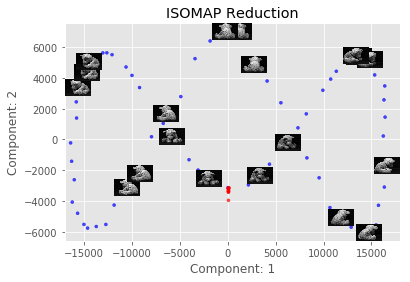

In [89]:
Plot2D(T, 'ISOMAP Reduction', 1, 2, colors)

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

In [17]:
# .. your code here ..
plot2D(T, 'ISOMAP', 0, 1)

NameError: name 'plot2D' is not defined

Answer the first two lab questions!

Create another for loop. This time it should iterate over all the images in the `Datasets/ALOI/32_i` directory. Just like last time, load up each image, process them the way you did previously, and append them into your existing `samples` list:

In [ ]:
# .. your code here ..

Convert `samples` to a DataFrame named `df`:

In [ ]:
# .. your code here ..

Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [ ]:
# .. your code here ..

Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

In [ ]:
# .. your code here ..

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

In [ ]:
# .. your code here ..

In [12]:
'asb'+'dasd'

'asbdasd'

In [28]:
len(samples)

72

In [29]:
type(samples[0])

numpy.ndarray

In [30]:
samples[0].shape

(144, 192)

In [6]:
len(img.reshape(-1))

27648

[[ 4  4  4 ...,  6  6  5]
 [ 5  5  5 ...,  7  6  5]
 [ 5  5  5 ...,  7  7  5]
 ..., 
 [12 11 11 ..., 13 12  7]
 [10 10 11 ..., 12 12  7]
 [11 11 10 ..., 11 11  7]]


In [10]:
len(samples[0])

27648

In [43]:
print(num_images) 

72


['a', 'b', '2', '1']

In [65]:
[1]*2

[1, 1]